In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold,cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
boston = pickle.load(open('E:/Machine Learning Course/Course2/week2/boston_housing_clean.pickle','rb'))

In [3]:
boston.keys()

dict_keys(['dataframe', 'description'])

In [4]:
boston_data = boston['dataframe']
boston_description = boston['description']

In [5]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
X = boston_data.drop('MEDV',axis=1)
y = boston_data['MEDV']

In [7]:
kf = KFold(shuffle=True,random_state=72018,n_splits=3)

In [8]:
for train_index,test_index in kf.split(X):
    print('Train index:', train_index[:10], len(train_index))
    print('Test index:', test_index[:10], len(test_index))
    print(' ')

Train index: [ 1  3  4  5  7  8 10 11 12 13] 337
Test index: [ 0  2  6  9 15 17 19 23 25 26] 169
 
Train index: [ 0  2  6  9 10 11 12 13 15 17] 337
Test index: [ 1  3  4  5  7  8 14 16 22 27] 169
 
Train index: [0 1 2 3 4 5 6 7 8 9] 338
Test index: [10 11 12 13 18 20 21 24 28 31] 168
 


In [9]:
scores = []
lr = LinearRegression()
for train_index,test_index in kf.split(X):
    X_train,X_test,y_train,y_test = (X.iloc[train_index,:],X.iloc[test_index,:],y[train_index],y[test_index])
    
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    score = r2_score(y_test.values,y_pred)
    scores.append(score)
scores

[0.6719348798472755, 0.7485020059212368, 0.6976807323597749]

In [10]:
scores = []
lr = LinearRegression()
s = StandardScaler()
for train_index,test_index in kf.split(X):
    X_train,X_test,y_train,y_test = (X.iloc[train_index,:],X.iloc[test_index,:],y[train_index],y[test_index])
    
    X_train_s = s.fit_transform(X_train)
    lr.fit(X_train_s,y_train)
    X_test_s = s.transform(X_test)
    y_pred = lr.predict(X_test_s)
    score = r2_score(y_test.values,y_pred)
    scores.append(score)
scores

[0.6719348798472713, 0.748502005921238, 0.6976807323597742]

In [11]:
estimator = Pipeline([("scaler",s),("regression",lr)])

In [12]:
estimator.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [13]:
prediction = cross_val_predict(estimator,X,y,cv=kf)
len(prediction)

506

In [14]:
r2_score(y,prediction)

0.7063531064161559

In [15]:
alphas = np.geomspace(1e-9,1e0,num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [33]:
scores = []

for alpha in alphas:
    las = Lasso(alpha=alpha,max_iter=100000)
    estimator = Pipeline([("scaler",s),("Lasso",las)])
    prediction = cross_val_predict(estimator,X,y,cv=kf)
    score = r2_score(y,prediction)
    scores.append(score)

In [17]:
list(zip(alphas,scores))

[(1e-09, 0.7063531064981925),
 (1e-08, 0.7063531072356071),
 (1e-07, 0.7063531145602441),
 (1e-06, 0.7063531882052065),
 (1e-05, 0.7063539165191507),
 (0.0001, 0.706361268093463),
 (0.001, 0.706433467041546),
 (0.01, 0.7070865958083234),
 (0.1, 0.705838151167185),
 (1.0, 0.6512724532884887)]

In [45]:
pf = PolynomialFeatures(degree=3)
scores = []

alphas = np.geomspace(0.001,10,5)
for alpha in alphas:
    las = Lasso(alpha=alpha,max_iter=100000)
    estimator = Pipeline([("Polynomial",pf),("scaler",s),("Lasso",las)])
    prediction = cross_val_predict(estimator,X,y,cv=kf)
    score = r2_score(y,prediction)
    scores.append(score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.838350315724256, tolerance: 2.73469821958457
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.426982961073804, tolerance: 2.777101952522255
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.85300036827084, tolerance: 3.030405585798816
  model = cd_fast.enet_coordinate_descent(


In [40]:
alphas

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [41]:
scores

[0.7697086980422645,
 0.8591002095361692,
 0.8280423631185616,
 0.7328688516176427,
 -0.000616160136140298]

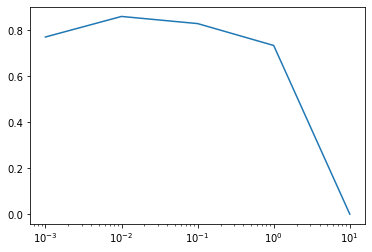

In [42]:
plt.semilogx(alphas,scores)

In [43]:
best_estimator = Pipeline([("Polynomial",PolynomialFeatures(degree=2)),("scaler",s),("Lasso",Lasso(alpha=0.01,max_iter=10000))])
best_estimator.fit(X,y)
best_estimator.score(X,y)

0.9032551408154245

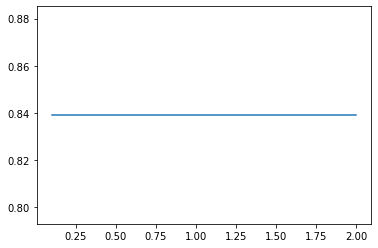

In [46]:
pf = PolynomialFeatures(degree=2)
alphas = np.geomspace(0.1,2,20)
scores = []

for aplha in alphas:
    ridge = Ridge(alpha=alpha,max_iter=100000)
    
    estimator = Pipeline([("Polynomial",pf),("scaler",s),("Ridge",ridge)])
    prediction = cross_val_predict(estimator,X,y,cv=kf)
    score = r2_score(y,prediction)
    scores.append(score)
    
plt.plot(alphas,scores)

In [47]:
best_estimator = Pipeline([
    ("Polynomial",PolynomialFeatures(degree=2,include_bias=False)),
    ("scaler",s),
    ("Lasso",Lasso(alpha=0.01))])

best_estimator.fit(X,y)
best_estimator.score(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 838.732034236875, tolerance: 4.2716295415019765
  model = cd_fast.enet_coordinate_descent(


0.9047578542960124

In [51]:
df_importance = pd.DataFrame(zip(best_estimator.named_steps['Polynomial'].get_feature_names(input_features=X.columns),best_estimator.named_steps['Lasso'].coef_, ))

In [56]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [52]:
df_importance

,0,1
0,CRIM,-0.000000
1,ZN,-3.829855
2,INDUS,3.480146
3,CHAS,4.057486
4,NOX,0.345174
...,...,...
99,PTRATIO B,0.561794
100,PTRATIO LSTAT,0.000000
101,B^2,-0.316750
102,B LSTAT,-1.346463


In [58]:
df_importance.sort_values(by=1)

,0,1
72,RM TAX,-7.484883
63,NOX RAD,-5.324131
71,RM RAD,-4.516639
93,RAD LSTAT,-4.455994
48,INDUS LSTAT,-4.416767
...,...,...
3,CHAS,4.057486
103,LSTAT^2,5.467342
95,TAX PTRATIO,7.142666
68,RM^2,8.325413


In [68]:
from sklearn.model_selection import GridSearchCV

estimator = Pipeline([("Polynomial_featuers",PolynomialFeatures()),("scaler",StandardScaler()),("ridge_regression",Ridge())])

param = {
    'Polynomial_featuers__degree':[1,2,3],
    'ridge_regression__alpha': np.geomspace(4,20,30)
}

grid = GridSearchCV(estimator,param,cv=kf)

In [69]:
grid.fit(X,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('Polynomial_featuers',
                                        PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'Polynomial_featuers__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 4.        ,  4.22826702,  4.46956049,  4.7246238 ,  4.99424274,
        5.27924796,  5.58051751,  5.89897953,  6.23561514,  6.59146146,
        6.96761476,  7.36523392,  7.78554391,  8.22983963,  8.69948987,
        9.19594151,  9.72072404, 10.27545421, 10.86184103, 11.48169104,
       12.13691388, 12.82952815, 13.56166768, 14.33558803, 15.15367351,
       16.01844446, 16.93256509, 17.89885162, 18.92028098, 20.        ])})

In [71]:
prediction = grid.predict(X)

In [72]:
r2_score(y,prediction)

0.8964707714558118

In [73]:
grid.best_score_ , grid.best_params_

(0.8546333782070418,
 {'Polynomial_featuers__degree': 2, 'ridge_regression__alpha': 4.0})

In [77]:
pd.DataFrame(grid.best_estimator_.named_steps['ridge_regression'].coef_)

,0
0,0.000000
1,0.247147
2,-1.183778
3,1.117001
4,1.022689
...,...
100,0.311177
101,0.269571
102,-0.664708
103,-1.414440


In [76]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Polynomial_featuers__degree,param_ridge_regression__alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.046748,0.066112,0.000000,0.000000,1,4.0,"{'Polynomial_featuers__degree': 1, 'ridge_regr...",0.672111,0.748235,0.701801,0.707382,0.031327,90
1,0.000000,0.000000,0.010416,0.007365,1,4.228267,"{'Polynomial_featuers__degree': 1, 'ridge_regr...",0.672103,0.748207,0.701986,0.707432,0.031307,89
2,0.005207,0.007364,0.000000,0.000000,1,4.46956,"{'Polynomial_featuers__degree': 1, 'ridge_regr...",0.672093,0.748175,0.702178,0.707482,0.031286,88
3,0.007379,0.006409,0.005215,0.007376,1,4.724624,"{'Polynomial_featuers__degree': 1, 'ridge_regr...",0.672081,0.748141,0.702375,0.707533,0.031265,87
4,0.005214,0.007374,0.000000,0.000000,1,4.994243,"{'Polynomial_featuers__degree': 1, 'ridge_regr...",0.672067,0.748104,0.702579,0.707583,0.031243,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.023635,0.004813,0.004038,0.004349,3,16.018444,"{'Polynomial_featuers__degree': 3, 'ridge_regr...",0.827782,0.867759,0.859693,0.851745,0.017261,23
86,0.014196,0.004389,0.008760,0.000971,3,16.932565,"{'Polynomial_featuers__degree': 3, 'ridge_regr...",0.827717,0.867351,0.859455,0.851508,0.017129,25
87,0.013491,0.004739,0.010094,0.000014,3,17.898852,"{'Polynomial_featuers__degree': 3, 'ridge_regr...",0.827628,0.866926,0.859179,0.851244,0.016996,27
88,0.016892,0.003382,0.003380,0.003432,3,18.920281,"{'Polynomial_featuers__degree': 3, 'ridge_regr...",0.827515,0.866483,0.858866,0.850955,0.016863,30
